## PCA##

**Priciple Component Analysis**

This is done first by identify hyperplane that lies closest to the data then project the data onto it. The goal is finding axis that preserves *maximum variance*. 

The unit vector that defines $i^{th}$ axis is called the $i^{th}$ *principle component*

To find PC, there is a matrix factorisation technique called *Singular Value Decomposition* (SVD). That can decompose training mateix $X_{m \times n}$ into $U_{m \times r}\cdot \Sigma_{r\times r} \cdot V^T_{r \times n}$. Where $\Sigma$ is a *singular* matr (diagnal zeros)

In [1]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

In [2]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

print(X_centered.shape, U.shape, s.shape, Vt.shape)
print(c1)

(150, 4) (150, 150) (4,) (4, 4)
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


### Projection
Once PC is identified, the points can be projected on the PC as a dot product of X by the matrix $W_d$ defined by matrix containing the first d principle component.

$X_d-proj = X \cdot W_d$

In [3]:
# projection of X into PC1, 2
W1 = X_centered.dot(c1)
W2 = X_centered.dot(c2)

Text(0, 0.5, 'PC2')

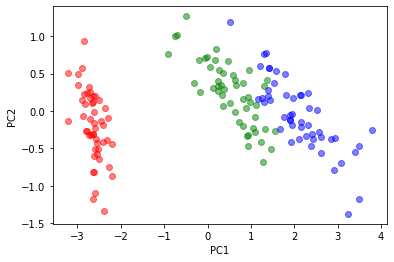

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(W1[np.where(y==0)], W2[np.where(y==0)], c = 'r', alpha =0.5)
ax.scatter(W1[np.where(y==1)], W2[np.where(y==1)], c = 'g', alpha =0.5)
ax.scatter(W1[np.where(y==2)], W2[np.where(y==2)], c = 'b', alpha =0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

## Sklearn Implementation ##


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

Text(0, 0.5, 'PC2')

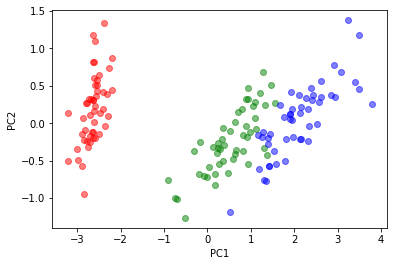

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

W1 = X2D[:,0]
W2 = X2D[:,1]

fig, ax = plt.subplots()
ax.scatter(W1[np.where(y==0)], W2[np.where(y==0)], c = 'r', alpha =0.5)
ax.scatter(W1[np.where(y==1)], W2[np.where(y==1)], c = 'g', alpha =0.5)
ax.scatter(W1[np.where(y==2)], W2[np.where(y==2)], c = 'b', alpha =0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [7]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

The above shows that 92% variance lies in PC1, and 5% lies in PC2, the rest 3 % are in other 2 PC's probably not worth using. Using above logic, the right dimension can be calculated like below:

In [8]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

[0.92461872 0.97768521 0.99478782 1.        ]
2


Another way is to plot a dimention variance ration graph and find the elbow.

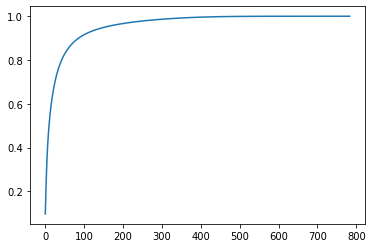

In [12]:
from scipy import io
mnist = io.loadmat('./mnist/mnist-original.mat')
X = mnist['data'].T
y = mnist['label'].reshape(70000,)

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(range(0, len(cumsum)), cumsum)

## Compression ##

The information can be compressed without keeping most of the data. While losing a bit of information, the original can be recontructed, and MSE between original and reconstructed called *reconstruction error*

In [13]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X)
X_recoverfed = pca.inverse_transform(X_reduced)

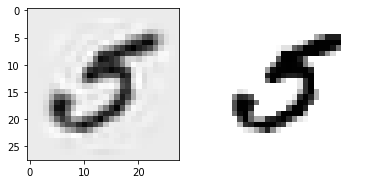

In [14]:
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline


some_digit1 = X_recoverfed[36000].reshape(28, 28)
some_digit2 = X[36000].reshape(28, 28)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(some_digit1, cmap = cm.binary, interpolation='nearest')
ax[1].imshow(some_digit2, cmap = cm.binary, interpolation='nearest')
   
plt.axis('off')
plt.show()

## Incremental PCA ##

PCA can also be splited into mini batches. 

In [15]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X)

In [17]:
## Another useful thing from numpy is to manipulate large array on disk as if in memory 
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html
filename = "./mnist/tmp"
X_mm = np.memmap(filename, dytype = 'float32', mode = 'readonly', shape = (m, n))
inc_pca = IncrementalPCA(n_components=154, n_batches = n_batches)
inc_pca.fit(X_mm)

NameError: name 'm' is not defined

## Randomised PCA ##

Sklearn offers another option called *randomised PCA*, which is a stochastic algorithm, and quickly find approximation of the first d PC's. IT's much faster than the traditional algorithm

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)